## Let's Access Data from [coindesk](https://www.coindesk.com/API) but [slowwly](http://slowwly.robertomurray.co.uk/).

In [9]:
import pandas as pd
import requests
import json
import time

coindesk_url = "https://api.coindesk.com/v1/bpi/historical/close.json?start=2020-01-01&end=2020-02-29"

### The response (routed through slowwly) takes a while

In [10]:
response = requests.get(coindesk_url)
data_dict = response.json()
time.sleep(7)
print(data_dict)

{'bpi': {'2020-01-01': 7188.4633, '2020-01-02': 6961.5683, '2020-01-03': 7346.58, '2020-01-04': 7355.855, '2020-01-05': 7356.3117, '2020-01-06': 7761.825, '2020-01-07': 8157.7617, '2020-01-08': 8042.8733, '2020-01-09': 7816.9233, '2020-01-10': 8189.265, '2020-01-11': 8016.4267, '2020-01-12': 8178.8833, '2020-01-13': 8105.4783, '2020-01-14': 8807.4267, '2020-01-15': 8808.4867, '2020-01-16': 8716.9133, '2020-01-17': 8890.25, '2020-01-18': 8901.17, '2020-01-19': 8698.5717, '2020-01-20': 8631.2883, '2020-01-21': 8727.6033, '2020-01-22': 8661.01, '2020-01-23': 8392.145, '2020-01-24': 8436.49, '2020-01-25': 8337.1017, '2020-01-26': 8602.7417, '2020-01-27': 8901.5067, '2020-01-28': 9393.2733, '2020-01-29': 9290.46, '2020-01-30': 9508.725, '2020-01-31': 9346.1333, '2020-02-01': 9388.6617, '2020-02-02': 9333.08, '2020-02-03': 9291.6433, '2020-02-04': 9175.3367, '2020-02-05': 9613.4033, '2020-02-06': 9750.5467, '2020-02-07': 9808.5967, '2020-02-08': 9897.6583, '2020-02-09': 10161.2833, '2020-02-

In [7]:
bpi_dict = data_dict["bpi"]
# df = pd.DataFrame.from_dict(
#     {
#         "Date": pd.Series(list(bpi_dict.keys()), dtype='datetime64[ns]'),
#         "Price": pd.Series(list(bpi_dict.values()), dtype='float64')
#     })
df = pd.DataFrame(
    {"Price": list(bpi_dict.values())},
    index = pd.Index(list(bpi_dict.keys()), dtype='datetime64[ns]'))

print(df.head())

                Price
2020-01-01  7188.4633
2020-01-02  6961.5683
2020-01-03  7346.5800
2020-01-04  7355.8550
2020-01-05  7356.3117


### Create a line chart for the Bitcoin Price Index data

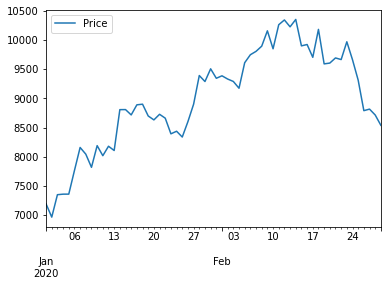

In [8]:
line = df.plot.line()